In [ ]:
!pip install librosa soundfile noisereduce


In [ ]:
import os
import librosa
import soundfile as sf
import noisereduce as nr
import numpy as np
from IPython.display import Audio, display


In [ ]:
def rms_db(y):
    rms = np.sqrt(np.mean(y**2))
    return 20 * np.log10(rms + 1e-9)

def normalize_rms(y, target_db=-20.0):
    cur = rms_db(y)
    gain = target_db - cur
    y_norm = y * (10 ** (gain / 20))

    # prevent clipping
    peak = np.max(np.abs(y_norm))
    if peak > 0.999:
        y_norm = y_norm / peak * 0.999

    return y_norm


In [ ]:
def process_audio(file_path, out_path):
    try:
        # Load audio ke mono 16 kHz
        audio, sr = librosa.load(file_path, sr=16000, mono=True)

        # Noise reduction
        reduced = nr.reduce_noise(y=audio, sr=sr)

        # High-pass Filter
        filtered = librosa.effects.preemphasis(reduced)

        # Normalize RMS (loudness seragam)
        normalized = normalize_rms(filtered, target_db=-20.0)

        # Save output ke WAV PCM16
        sf.write(out_path, normalized, sr, subtype='PCM_16')

        return True
    except Exception as e:
        print("Error processing", file_path, ":", e)
        return False


In [ ]:
# ============================
# SET YOUR PATH HERE
# ============================
input_dir  = "/content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW"
output_dir = "/content/drive/MyDrive/noise_clean"
# ============================

os.makedirs(output_dir, exist_ok=True)

genders = ["cowo", "cewe"]  # sesuai struktur dataset kamu

for g in genders:
    in_path  = os.path.join(input_dir, g)     # RAW/cowo atau RAW/cewe
    out_path = os.path.join(output_dir, g)
    os.makedirs(out_path, exist_ok=True)

    if not os.path.exists(in_path):
        print("FOLDER TIDAK ADA:", in_path)
        continue

    for file in os.listdir(in_path):
        if file.endswith((".wav", ".mp3", ".m4a", ".opus")):
            raw_file   = os.path.join(in_path, file)
            clean_file = os.path.join(
                out_path,
                file.replace(".m4a", ".wav")
                    .replace(".mp3", ".wav")
                    .replace(".opus", ".wav")
            )

            print("Processing:", raw_file)
            status = process_audio(raw_file, clean_file)

            if status:
                print("✓ Done:", clean_file)
            else:
                print("✗ Failed:", raw_file)

print("\nSELESAI! Semua file telah dibersihkan.")


Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/KHOIRUL.opus
✓ Done: /content/drive/MyDrive/noise_clean/cowo/KHOIRUL.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/BEMA.opus
✓ Done: /content/drive/MyDrive/noise_clean/cowo/BEMA.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/bagus.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/bagus.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/sapta.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/sapta.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/ayas.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/ayas.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/irvan.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/irvan.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/ridho.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/ridho.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/emart.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/emart.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/alian.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/alian.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/kevin.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/kevin.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/rafael.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/rafael.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/ezra.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/ezra.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/hagib.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/hagib.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/aldi.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/aldi.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/bintang.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/bintang.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/fadil.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/fadil.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/yobel.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/yobel.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/enzo.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/enzo.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/erfan.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/erfan.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/jemar.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/jemar.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/alan.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/alan.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/andrew.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/andrew.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/armaiza.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/armaiza.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/dap24.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/dap24.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/dendi.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/dendi.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/azmi.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/azmi.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/mario.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/mario.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/ridho 2.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/ridho 2.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/zaki.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/zaki.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/samuel.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/samuel.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/reja.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/reja.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/nawwap.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/nawwap.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/dapa22.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/dapa22.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/wesly.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/wesly.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/dapa23.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/dapa23.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/ukas.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/ukas.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/reza.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/reza.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/niko.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cowo/niko.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/salwa.opus
✓ Done: /content/drive/MyDrive/noise_clean/cewe/salwa.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/alvia.opus
✓ Done: /content/drive/MyDrive/noise_clean/cewe/alvia.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/alya.opus
✓ Done: /content/drive/MyDrive/noise_clean/cewe/alya.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/puspa.opus
✓ Done: /content/drive/MyDrive/noise_clean/cewe/puspa.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/najwa.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cewe/najwa.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/dinda.opus
✓ Done: /content/drive/MyDrive/noise_clean/cewe/dinda.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/ifah.opus
✓ Done: /content/drive/MyDrive/noise_clean/cewe/ifah.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/WhatsApp Audio 2025-11-06 at 12.32.50_eb33b066.mp3


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cewe/WhatsApp Audio 2025-11-06 at 12.32.50_eb33b066.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/WhatsApp Audio 2025-11-06 at 16.39.53_e73ba2fb.waptt.opus
✓ Done: /content/drive/MyDrive/noise_clean/cewe/WhatsApp Audio 2025-11-06 at 16.39.53_e73ba2fb.waptt.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/WhatsApp Audio 2025-11-06 at 16.34.31_117d95f5.mp3


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cewe/WhatsApp Audio 2025-11-06 at 16.34.31_117d95f5.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/Untitled6Nov20251638.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cewe/Untitled6Nov20251638.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/WhatsApp Audio 2025-11-06 at 16.51.59_a05ab3b4.waptt.opus
✓ Done: /content/drive/MyDrive/noise_clean/cewe/WhatsApp Audio 2025-11-06 at 16.51.59_a05ab3b4.waptt.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/WhatsApp Audio 2025-11-06 at 18.27.14_ee54f225.waptt.opus
✓ Done: /content/drive/MyDrive/noise_clean/cewe/WhatsApp Audio 2025-11-06 at 18.27.14_ee54f225.waptt.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/WhatsApp Audio 2025-11-06 at 18.28.25_39559f67.waptt.opus
✓ Done: /content/drive/MyDrive/noise_clean/cewe/WhatsApp Audio 2025-11-06 at 18.28.25_39559f67.waptt.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/WhatsApp Audio 2025-11-06 at 18.20.05_059d8140.mp3
✓ Done: /content/drive/MyDrive/noise_clean/cewe/WhatsApp Audio 2025-11-06 at 18.20.05_059d8140.

/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cewe/WhatsApp Audio 2025-11-06 at 19.09.49_318d9f6c.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/ester-2024.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cewe/ester-2024.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/april-2025.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cewe/april-2025.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/chafia-2025.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cewe/chafia-2025.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/ganiyaa-2022.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cewe/ganiyaa-2022.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/dearni-2022.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cewe/dearni-2022.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/difa-2024.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cewe/difa-2024.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/Dl.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cewe/Dl.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/citra-2025.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cewe/citra-2025.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/kasih-2025.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cewe/kasih-2025.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/Lidia.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cewe/Lidia.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/Jauzah.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cewe/Jauzah.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/Gisela.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cewe/Gisela.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/Resti.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cewe/Resti.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/kaysah.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cewe/kaysah.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/jeanis.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cewe/jeanis.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/elisabet-2025.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cewe/elisabet-2025.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/melania.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cewe/melania.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/oca.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cewe/oca.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/lala.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cewe/lala.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/fani.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cewe/fani.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/nayla.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cewe/nayla.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/rasya.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cewe/rasya.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/ganis.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cewe/ganis.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/ginar.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cewe/ginar.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/Marleta.opus
✓ Done: /content/drive/MyDrive/noise_clean/cewe/Marleta.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/vira.opus
✓ Done: /content/drive/MyDrive/noise_clean/cewe/vira.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/patricia.opus
✓ Done: /content/drive/MyDrive/noise_clean/cewe/patricia.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/dwi.opus
✓ Done: /content/drive/MyDrive/noise_clean/cewe/dwi.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/yunike-2025.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cewe/yunike-2025.wav
Processing: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/zanifah.m4a


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ Done: /content/drive/MyDrive/noise_clean/cewe/zanifah.wav

SELESAI! Semua file telah dibersihkan.


In [ ]:
test_file = "/content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/Gisela.m4a"  # ganti sesuai file kamu
temp_out  = "/content/drive/MyDrive/audio_test_output.wav"

process_audio(test_file, temp_out)

print("▶️ Suara Asli")
display(Audio(test_file))

print("▶️ Suara Hasil Clean")
display(Audio(temp_out))


/tmp/ipython-input-4112289949.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)


▶️ Suara Asli


▶️ Suara Hasil Clean


/tmp/ipython-input-898522383.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y_raw, _ = librosa.load(test_file, sr=16000)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


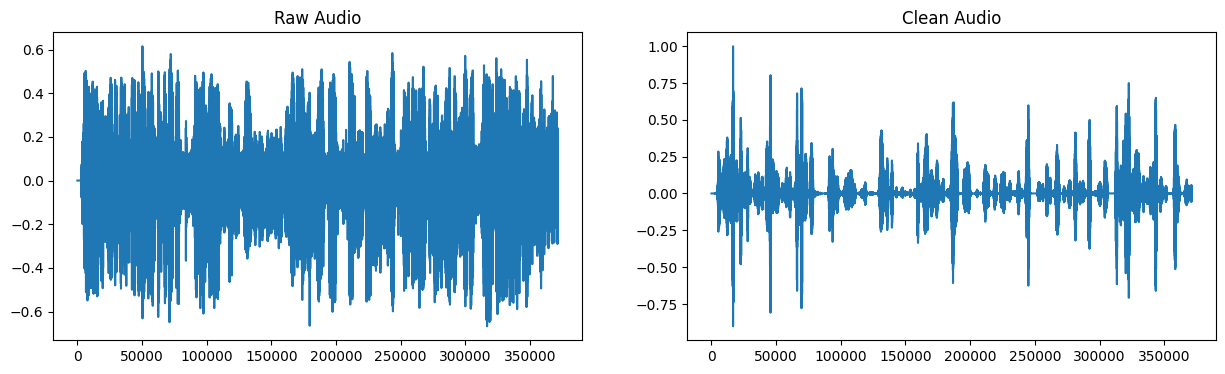

In [ ]:
import matplotlib.pyplot as plt

y_raw, _ = librosa.load(test_file, sr=16000)
y_clean, _ = librosa.load(temp_out, sr=16000)

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title("Raw Audio")
plt.plot(y_raw)

plt.subplot(1,2,2)
plt.title("Clean Audio")
plt.plot(y_clean)

plt.show()


In [ ]:
print("RMS Raw:", rms_db(y_raw))
print("RMS Clean:", rms_db(y_clean))


RMS Raw: -17.57532
RMS Clean: -26.165874


In [ ]:
import os
import librosa
import noisereduce as nr
import soundfile as sf
import numpy as np

# === RMS/Loudness Normalization ===
def rms_db(y):
    rms = np.sqrt(np.mean(y**2))
    return 20 * np.log10(rms + 1e-9)

def normalize_rms(y, target_db=-20.0):
    cur = rms_db(y)
    gain = target_db - cur
    y_norm = y * (10 ** (gain / 20))

    # prevent clipping
    peak = np.max(np.abs(y_norm))
    if peak > 0.999:
        y_norm = y_norm / peak * 0.999

    return y_norm


# === PROSES SATU AUDIO ===
def process_audio(file_path, out_path):
    try:
        audio, sr = librosa.load(file_path, sr=16000, mono=True)

        # noise reduction
        reduced = nr.reduce_noise(y=audio, sr=sr)

        # high-pass filter
        filtered = librosa.effects.preemphasis(reduced)

        # rms normalization
        normalized = normalize_rms(filtered, target_db=-20.0)

        # save WAV
        sf.write(out_path, normalized, sr, subtype='PCM_16')
        return True

    except Exception as e:
        print("ERROR:", file_path, " -> ", e)
        return False


In [ ]:
# ============================
# SET YOUR PATH HERE
# ============================
input_dir  = "/content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW"
output_dir = "/content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean"
# ============================

os.makedirs(output_dir, exist_ok=True)

genders = ["cowo", "cewe"]   # wajib sesuai folder nama kamu

for g in genders:
    in_path  = os.path.join(input_dir, g)
    out_path = os.path.join(output_dir, g)

    os.makedirs(out_path, exist_ok=True)

    print("\n=================================")
    print("▶ Processing folder:", in_path)
    print("=================================\n")

    if not os.path.exists(in_path):
        print("❌ Folder tidak ditemukan:", in_path)
        continue

    for file in os.listdir(in_path):
        if file.lower().endswith((".wav", ".mp3", ".m4a", ".opus")):

            raw_file   = os.path.join(in_path, file)
            clean_file = os.path.join(
                    out_path,
                    file.replace(".m4a", ".wav")
                        .replace(".mp3", ".wav")
                        .replace(".opus", ".wav")
                )

            print("• Processing:", file)
            ok = process_audio(raw_file, clean_file)

            if ok:
                print("  ✓ Selesai →", clean_file)
            else:
                print("  ✗ Gagal →", raw_file)

print("\n===============================")
print("🎉 SELESAI! Semua file berhasil diproses.")
print("===============================\n")



▶ Processing folder: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo

• Processing: KHOIRUL.opus
  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/KHOIRUL.wav
• Processing: BEMA.opus
  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/BEMA.wav
• Processing: bagus.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/bagus.wav
• Processing: sapta.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/sapta.wav
• Processing: ayas.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/ayas.wav
• Processing: irvan.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/irvan.wav
• Processing: ridho.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/ridho.wav
• Processing: emart.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/emart.wav
• Processing: alian.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/alian.wav
• Processing: kevin.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/kevin.wav
• Processing: rafael.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/rafael.wav
• Processing: ezra.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/ezra.wav
• Processing: hagib.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/hagib.wav
• Processing: aldi.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/aldi.wav
• Processing: bintang.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/bintang.wav
• Processing: fadil.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/fadil.wav
• Processing: yobel.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/yobel.wav
• Processing: enzo.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/enzo.wav
• Processing: erfan.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/erfan.wav
• Processing: jemar.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/jemar.wav
• Processing: alan.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/alan.wav
• Processing: andrew.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/andrew.wav
• Processing: armaiza.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/armaiza.wav
• Processing: dap24.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/dap24.wav
• Processing: dendi.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/dendi.wav
• Processing: azmi.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/azmi.wav
• Processing: mario.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/mario.wav
• Processing: ridho 2.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/ridho 2.wav
• Processing: zaki.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/zaki.wav
• Processing: samuel.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/samuel.wav
• Processing: reja.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/reja.wav
• Processing: nawwap.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/nawwap.wav
• Processing: dapa22.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/dapa22.wav
• Processing: wesly.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/wesly.wav
• Processing: dapa23.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/dapa23.wav
• Processing: ukas.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/ukas.wav
• Processing: reza.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/reza.wav
• Processing: niko.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cowo/niko.wav

▶ Processing folder: /content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe

• Processing: salwa.opus
  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/salwa.wav
• Processing: alvia.opus
  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/alvia.wav
• Processing: alya.opus
  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/alya.wav
• Processing: puspa.opus
  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/puspa.wav
• Processing: najwa.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/najwa.wav
• Processing: dinda.opus
  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/dinda.wav
• Processing: ifah.opus
  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/ifah.wav
• Processing: WhatsApp Audio 2025-11-06 at 12.32.50_eb33b066.mp3


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/WhatsApp Audio 2025-11-06 at 12.32.50_eb33b066.wav
• Processing: WhatsApp Audio 2025-11-06 at 16.39.53_e73ba2fb.waptt.opus
  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/WhatsApp Audio 2025-11-06 at 16.39.53_e73ba2fb.waptt.wav
• Processing: WhatsApp Audio 2025-11-06 at 16.34.31_117d95f5.mp3


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/WhatsApp Audio 2025-11-06 at 16.34.31_117d95f5.wav
• Processing: Untitled6Nov20251638.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/Untitled6Nov20251638.wav
• Processing: WhatsApp Audio 2025-11-06 at 16.51.59_a05ab3b4.waptt.opus
  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/WhatsApp Audio 2025-11-06 at 16.51.59_a05ab3b4.waptt.wav
• Processing: WhatsApp Audio 2025-11-06 at 18.27.14_ee54f225.waptt.opus
  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/WhatsApp Audio 2025-11-06 at 18.27.14_ee54f225.waptt.wav
• Processing: WhatsApp Audio 2025-11-06 at 18.28.25_39559f67.waptt.opus
  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/WhatsApp Audio 2025-11-06 at 18.28.25_39559f67.waptt.wav
• Processing: WhatsApp Audio 2025-11-06 at 18.20.05_059d8140.mp3
  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/WhatsApp Audio 2025-11-06 at 18.20.05_059d8140.wav
• Processing: WhatsApp Audio 2025-11-06 at 18.48.09_1b076

/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/WhatsApp Audio 2025-11-06 at 19.09.49_318d9f6c.wav
• Processing: ester-2024.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/ester-2024.wav
• Processing: april-2025.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/april-2025.wav
• Processing: chafia-2025.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/chafia-2025.wav
• Processing: ganiyaa-2022.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/ganiyaa-2022.wav
• Processing: dearni-2022.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/dearni-2022.wav
• Processing: difa-2024.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/difa-2024.wav
• Processing: Dl.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/Dl.wav
• Processing: citra-2025.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/citra-2025.wav
• Processing: kasih-2025.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/kasih-2025.wav
• Processing: Lidia.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/Lidia.wav
• Processing: Jauzah.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/Jauzah.wav
• Processing: Gisela.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/Gisela.wav
• Processing: Resti.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/Resti.wav
• Processing: kaysah.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/kaysah.wav
• Processing: jeanis.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/jeanis.wav
• Processing: elisabet-2025.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/elisabet-2025.wav
• Processing: melania.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/melania.wav
• Processing: oca.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/oca.wav
• Processing: lala.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/lala.wav
• Processing: fani.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/fani.wav
• Processing: nayla.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/nayla.wav
• Processing: rasya.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/rasya.wav
• Processing: ganis.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/ganis.wav
• Processing: ginar.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/ginar.wav
• Processing: Marleta.opus
  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/Marleta.wav
• Processing: vira.opus
  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/vira.wav
• Processing: patricia.opus
  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/patricia.wav
• Processing: dwi.opus
  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/dwi.wav
• Processing: yunike-2025.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/yunike-2025.wav
• Processing: zanifah.m4a


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


  ✓ Selesai → /content/drive/MyDrive/Tugas Kelompok Deep Learning/noise clean/cewe/zanifah.wav

🎉 SELESAI! Semua file berhasil diproses.



In [ ]:
test_file  = "/content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cewe/Jauzah.m4a"
test_output = "/content/test_output.wav"

ok = process_audio(test_file, test_output)

if ok:
    print("Berhasil! Cek file:", test_output)
else:
    print("Gagal processing.")


/tmp/ipython-input-1665874679.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Berhasil! Cek file: /content/test_output.wav


#partisi data

In [ ]:
import os
import librosa
import soundfile as sf
import numpy as np

# ============================
# SET FOLDER
# ============================
input_dir = "/content/drive/MyDrive/noise_clean"
output_dir = "/content/drive/MyDrive/Tugas Kelompok Deep Learning/Clean_Partition"

os.makedirs(output_dir, exist_ok=True)
os.makedirs(os.path.join(output_dir, "cowo"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "cewe"), exist_ok=True)

# durasi segmen (detik)
SEGMENT_DURATION = 3
SR = 16000


def split_audio(audio, sr, segment_length=3):
    """Split audio into fixed length segments."""
    seg_samples = sr * segment_length
    total_samples = len(audio)

    segments = []
    start = 0

    while start + seg_samples <= total_samples:
        segment = audio[start:start + seg_samples]
        segments.append(segment)
        start += seg_samples

    return segments


# ============================
# PROCESS FUNCTION
# ============================
def process_folder(gender, prefix):
    in_path = os.path.join(input_dir, gender)
    out_path = os.path.join(output_dir, gender)

    files = sorted(os.listdir(in_path))
    counter = 1

    for file in files:
        if file.lower().endswith(".wav"):
            file_path = os.path.join(in_path, file)

            # rename basic file
            base_name = f"{prefix}_{counter:03d}"
            audio, sr = librosa.load(file_path, sr=SR, mono=True)

            # split per 3 seconds
            segments = split_audio(audio, SR, SEGMENT_DURATION)

            print(f"{file} → {len(segments)} segments")

            # save each segment
            for i, seg in enumerate(segments, start=1):
                seg_name = f"{base_name}_seg{i}.wav"
                save_path = os.path.join(out_path, seg_name)
                sf.write(save_path, seg, SR)

            counter += 1


# ============================
# RUN FOR BOTH GENDERS
# ============================
print("Processing COWO...")
process_folder("cowo", "L")

print("\nProcessing CEWE...")
process_folder("cewe", "P")

print("\nSELESAI! Semua file berhasil di-rename dan dipotong.")
print("Folder hasil:", output_dir)


Processing COWO...
BEMA.wav → 7 segments
KHOIRUL.wav → 5 segments
alan.wav → 4 segments
aldi.wav → 4 segments
alian.wav → 4 segments
andrew.wav → 4 segments
armaiza.wav → 5 segments
ayas.wav → 4 segments
azmi.wav → 5 segments
bagus.wav → 3 segments
bintang.wav → 4 segments
dap24.wav → 4 segments
dapa22.wav → 5 segments
dapa23.wav → 5 segments
dendi.wav → 5 segments
emart.wav → 4 segments
enzo.wav → 4 segments
erfan.wav → 4 segments
ezra.wav → 4 segments
fadil.wav → 4 segments
hagib.wav → 4 segments
irvan.wav → 4 segments
jemar.wav → 4 segments
kevin.wav → 4 segments
mario.wav → 5 segments
nawwap.wav → 5 segments
niko.wav → 5 segments
rafael.wav → 4 segments
reja.wav → 5 segments
reza.wav → 5 segments
ridho 2.wav → 5 segments
ridho.wav → 4 segments
samuel.wav → 5 segments
sapta.wav → 4 segments
ukas.wav → 5 segments
wesly.wav → 5 segments
yobel.wav → 4 segments
zaki.wav → 5 segments

Processing CEWE...
Dl.wav → 6 segments
Gisela.wav → 7 segments
Jauzah.wav → 6 segments
Lidia.wav → 6 seg

#FULL CODE MFCC EXTRACTION

In [ ]:
import os
import librosa
import numpy as np

# ============================
# SET PATH DATA
# ============================
base_dir = "/content/drive/MyDrive/Tugas Kelompok Deep Learning/Clean_Partition"

folders = {
    "cowo": 0,   # label 0
    "cewe": 1    # label 1
}

# ============================
# PARAMETER MFCC (Sesuai Jurnal)
# ============================
SR = 16000
N_MFCC = 13
N_FFT = 2048
HOP = 512

X = []
y = []


def extract_mfcc(file_path):
    audio, sr = librosa.load(file_path, sr=SR, mono=True)

    mfcc = librosa.feature.mfcc(
        y=audio,
        sr=sr,
        n_mfcc=N_MFCC,
        n_fft=N_FFT,
        hop_length=HOP
    )

    # transpose → (time, mfcc)
    return mfcc.T


# ============================
# LOOP SEMUA FILE
# ============================
for folder, label in folders.items():
    path = os.path.join(base_dir, folder)
    print(f"\nProcessing folder: {folder}")

    for file in sorted(os.listdir(path)):
        if file.endswith(".wav"):
            fpath = os.path.join(path, file)

            mfcc = extract_mfcc(fpath)

            X.append(mfcc)
            y.append(label)

            print("  ✔", file, "→ MFCC shape:", mfcc.shape)

# Convert to numpy
X = np.array(X, dtype=object)   # object karena panjang time berbeda
y = np.array(y)

# ============================
# SIMPAN FILE
# ============================
save_dir = "/content/drive/MyDrive/Tugas Kelompok Deep Learning/mfcc_dataset"
os.makedirs(save_dir, exist_ok=True)

np.save(os.path.join(save_dir, "X.npy"), X)
np.save(os.path.join(save_dir, "y.npy"), y)

print("\n==========================")
print("MFCC extraction DONE!")
print("Saved to:", save_dir)
print("==========================")



Processing folder: cowo
  ✔ L_001_seg1.wav → MFCC shape: (94, 13)
  ✔ L_001_seg2.wav → MFCC shape: (94, 13)
  ✔ L_001_seg3.wav → MFCC shape: (94, 13)
  ✔ L_001_seg4.wav → MFCC shape: (94, 13)
  ✔ L_001_seg5.wav → MFCC shape: (94, 13)
  ✔ L_001_seg6.wav → MFCC shape: (94, 13)
  ✔ L_001_seg7.wav → MFCC shape: (94, 13)
  ✔ L_002_seg1.wav → MFCC shape: (94, 13)
  ✔ L_002_seg2.wav → MFCC shape: (94, 13)
  ✔ L_002_seg3.wav → MFCC shape: (94, 13)
  ✔ L_002_seg4.wav → MFCC shape: (94, 13)
  ✔ L_002_seg5.wav → MFCC shape: (94, 13)
  ✔ L_003_seg1.wav → MFCC shape: (94, 13)
  ✔ L_003_seg2.wav → MFCC shape: (94, 13)
  ✔ L_003_seg3.wav → MFCC shape: (94, 13)
  ✔ L_003_seg4.wav → MFCC shape: (94, 13)
  ✔ L_004_seg1.wav → MFCC shape: (94, 13)
  ✔ L_004_seg2.wav → MFCC shape: (94, 13)
  ✔ L_004_seg3.wav → MFCC shape: (94, 13)
  ✔ L_004_seg4.wav → MFCC shape: (94, 13)
  ✔ L_005_seg1.wav → MFCC shape: (94, 13)
  ✔ L_005_seg2.wav → MFCC shape: (94, 13)
  ✔ L_005_seg3.wav → MFCC shape: (94, 13)
  ✔ L_005

#model

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf

# Load dataset
X = np.load("/content/drive/MyDrive/Tugas Kelompok Deep Learning/mfcc_dataset/X.npy", allow_pickle=True)
y = np.load("/content/drive/MyDrive/Tugas Kelompok Deep Learning/mfcc_dataset/y.npy")

print("Total samples:", len(X))

# Pad MFCC sequence agar sama panjang untuk masuk ke RNN
X_padded = pad_sequences(X, dtype='float32', padding='post')

# Train-test split 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X_padded, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Total samples: 468
Train shape: (374, 94, 13)
Test shape: (94, 94, 13)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(model, X_test, y_test):
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Confusion Matrix:\n", cm)


model_lstm = Sequential([
    LSTM(64, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_lstm = model_lstm.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

print("\n--- LSTM DONE TRAINING ---")
evaluate_model(model_lstm, X_test, y_test)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5539 - loss: 0.6813 - val_accuracy: 0.6133 - val_loss: 0.6541
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6744 - loss: 0.6153 - val_accuracy: 0.6533 - val_loss: 0.6381
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7386 - loss: 0.5646 - val_accuracy: 0.6800 - val_loss: 0.6053
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7842 - loss: 0.5099 - val_accuracy: 0.6800 - val_loss: 0.5744
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8441 - loss: 0.4602 - val_accuracy: 0.7600 - val_loss: 0.5496
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8667 - loss: 0.4246 - val_accuracy: 0.8000 - val_loss: 0.4997
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8949 - loss: 0.3834 - val_accuracy: 0.8533 - val_loss: 0.4408
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9091 - loss: 0.3317 - val_accuracy: 0.9200 - val_loss: 0.

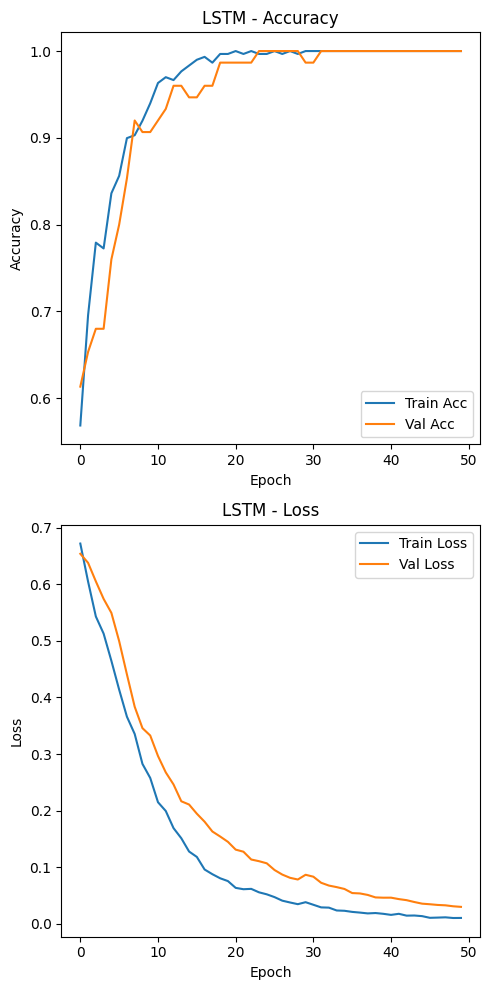

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_history(histories, titles):
    num_histories = len(histories)
    fig, axes = plt.subplots(2, num_histories, figsize=(5 * num_histories, 10))

    # Ensure 'axes' is always a 2D array for consistent indexing
    if num_histories == 1:
        axes = axes[:, np.newaxis] # Convert 1D array of 2 elements into 2D array (2, 1)

    for idx, (history, title) in enumerate(zip(histories, titles)):

        # Accuracy Plot
        axes[0, idx].plot(history.history['accuracy'], label='Train Acc')
        axes[0, idx].plot(history.history['val_accuracy'], label='Val Acc')
        axes[0, idx].set_title(f'{title} - Accuracy')
        axes[0, idx].set_xlabel('Epoch')
        axes[0, idx].set_ylabel('Accuracy')
        axes[0, idx].legend()

        # Loss Plot
        axes[1, idx].plot(history.history['loss'], label='Train Loss')
        axes[1, idx].plot(history.history['val_loss'], label='Val Loss')
        axes[1, idx].set_title(f'{title} - Loss')
        axes[1, idx].set_xlabel('Epoch')
        axes[1, idx].set_ylabel('Loss')
        axes[1, idx].legend()

    plt.tight_layout()
    plt.show()


plot_history(
    histories= [history_lstm],
    titles=["LSTM"]
)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


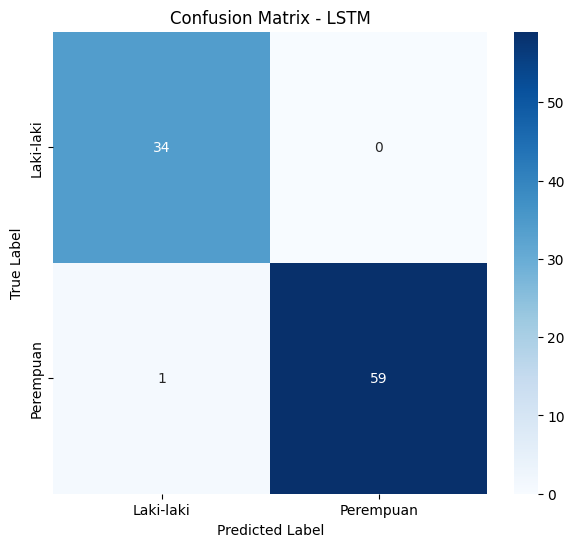

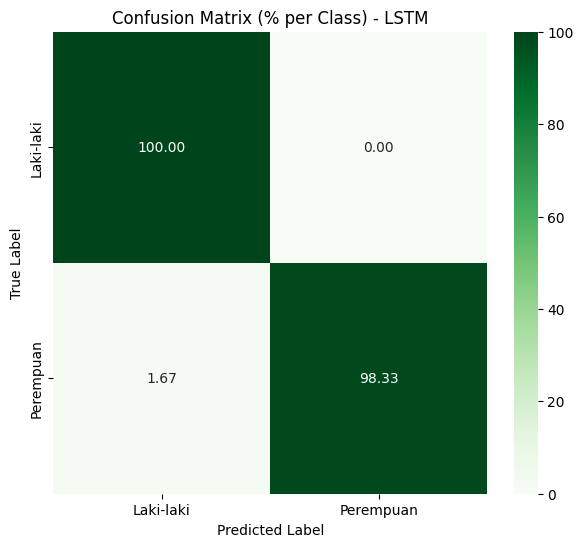


=== Classification Report (LSTM) ===
              precision    recall  f1-score   support

   Laki-laki       0.97      1.00      0.99        34
   Perempuan       1.00      0.98      0.99        60

    accuracy                           0.99        94
   macro avg       0.99      0.99      0.99        94
weighted avg       0.99      0.99      0.99        94



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, model_name):
    labels = ["Laki-laki", "Perempuan"]

    # Matriks CM
    cm = confusion_matrix(y_true, y_pred)
    cm_percent = cm.astype("float") / cm.sum(axis=1)[:, None] * 100

    # Plot angka absolut
    plt.figure(figsize=(7, 6))
    sns.heatmap(
        cm, annot=True, fmt='d', cmap="Blues",
        xticklabels=labels, yticklabels=labels
    )
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Plot persen
    plt.figure(figsize=(7, 6))
    sns.heatmap(
        cm_percent, annot=True, fmt='.2f', cmap="Greens",
        xticklabels=labels, yticklabels=labels
    )
    plt.title(f"Confusion Matrix (% per Class) - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    print(f"\n=== Classification Report ({model_name}) ===")
    print(classification_report(y_true, y_pred, target_names=labels))


# ===============================
#   HITUNG PREDIKSI
# ===============================
y_pred_lstm = (model_lstm.predict(X_test) > 0.5).astype(int)


# ===============================
#   TAMPILKAN CONFUSION MATRIX
# ===============================


plot_confusion_matrix(y_test, y_pred_lstm, "LSTM")



In [ ]:
import pandas as pd

def evaluate_all_models(models, names):
    rows = []

    for model, name in zip(models, names):
        y_pred = (model.predict(X_test) > 0.5).astype("int32")

        acc  = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec  = recall_score(y_test, y_pred)
        f1   = f1_score(y_test, y_pred)
        cm   = confusion_matrix(y_test, y_pred)

        print(f"\n===== {name} CONFUSION MATRIX =====")
        print(cm)

        rows.append([name, acc, prec, rec, f1])

    df = pd.DataFrame(rows, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])
    return df


df_metrics = evaluate_all_models(
    models=[model_lstm],
    names=["LSTM"]
)

print("\n===== RINGKASAN METRIK MODEL LSTM =====\n")
df_metrics


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

===== LSTM CONFUSION MATRIX =====
[[34  0]
 [ 1 59]]

===== RINGKASAN METRIK MODEL LSTM =====



,Model,Accuracy,Precision,Recall,F1-score
0,LSTM,0.989362,1.0,0.983333,0.991597


#model prediksi

In [ ]:
import librosa
import numpy as np

# Parameter MFCC (HARUS sama dengan training)
SR = 16000
N_MFCC = 13
N_FFT = 2048
HOP = 512

def predict_gender(model, file_path):
    # Load audio
    audio, sr = librosa.load(file_path, sr=SR, mono=True)

    # Extract MFCC
    mfcc = librosa.feature.mfcc(
        y=audio,
        sr=sr,
        n_mfcc=N_MFCC,
        n_fft=N_FFT,
        hop_length=HOP
    ).T

    # Pad like training
    mfcc_padded = tf.keras.preprocessing.sequence.pad_sequences(
        [mfcc], dtype='float32', padding='post'
    )

    # Predict
    pred = model.predict(mfcc_padded)[0][0]
    label = "Laki-laki" if pred < 0.5 else "Perempuan"

    return label, float(pred)


#pengujian


In [ ]:
test_file = "/content/drive/MyDrive/Tugas Kelompok Deep Learning/RAW/cowo/andrew.m4a"  # ganti file uji

label, score = predict_gender(model_lstm, test_file)

print("Prediksi:", label)
print("Confidence:", score)


/tmp/ipython-input-3404665374.py:12: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=SR, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Prediksi: Laki-laki
Confidence: 0.09097228199243546


#simpan model

In [ ]:
import os

save_dir = "/content/drive/MyDrive/Tugas Kelompok Deep Learning/Models"
os.makedirs(save_dir, exist_ok=True)

model_lstm.save(f"{save_dir}/lstm.h5")


print(" MODEL TERSIMPAN DI DRIVE!")


 MODEL TERSIMPAN DI DRIVE!


In [ ]:
from tensorflow.keras.models import load_model

model_lstm_loaded = load_model("/content/drive/MyDrive/Tugas Kelompok Deep Learning/Models/lstm.h5")